In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
#----------------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [72]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [73]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [74]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [75]:
df.shape

(205, 26)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Copy Data

In [77]:
car=df.copy()

In [78]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [79]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

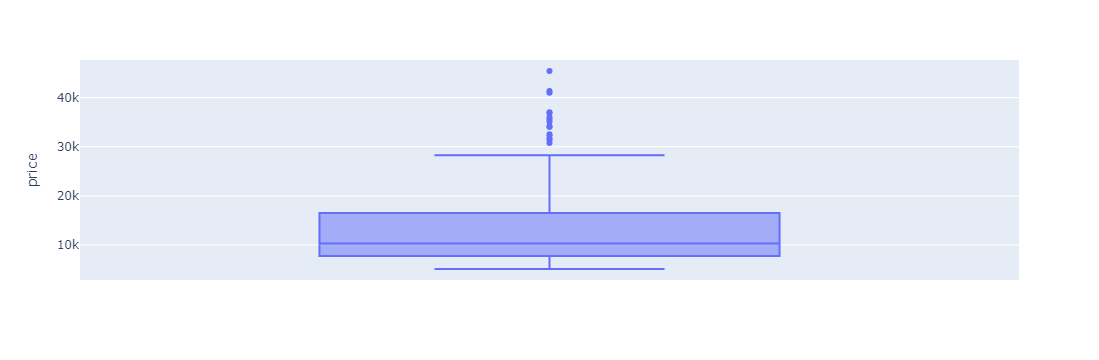

In [80]:
fig=px.box(car,y='price')
fig.show()

In [81]:
car['symboling'].value_counts()

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

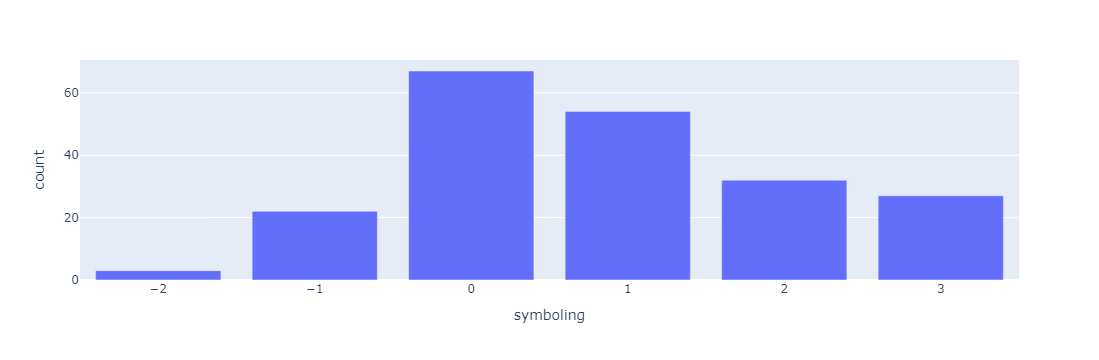

In [82]:
px.bar(car['symboling'].value_counts(),y='count')

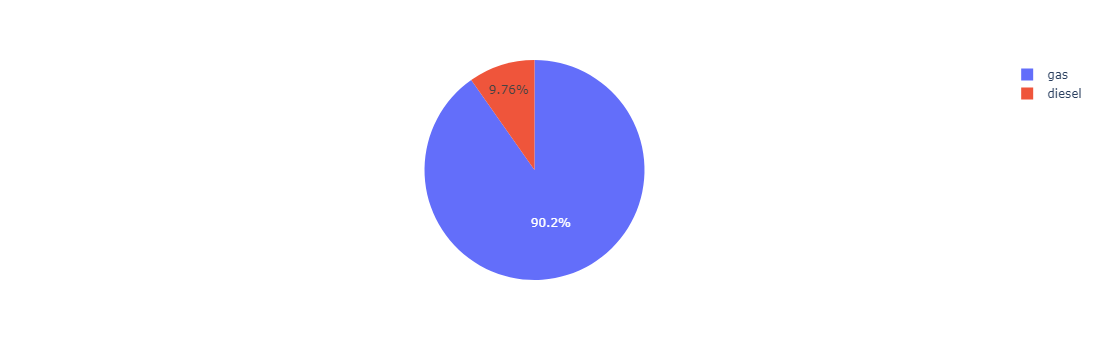

In [83]:
px.pie(car['fueltype'].value_counts(),values='count',names=['gas','diesel'])

In [84]:
car['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [85]:
car['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

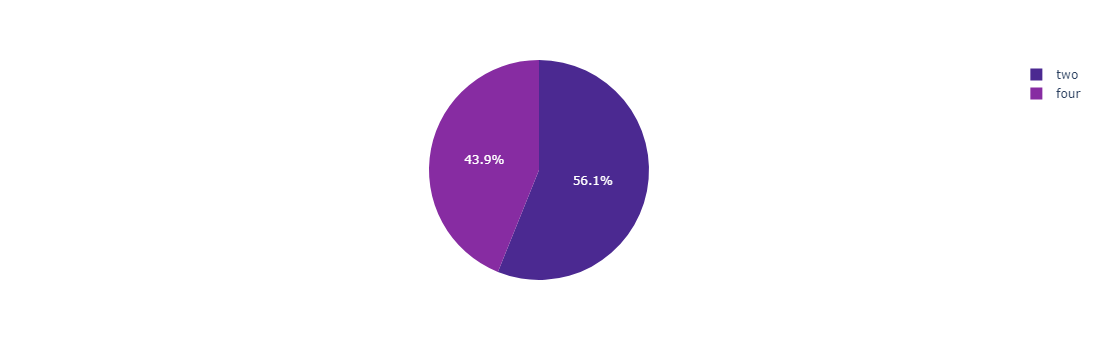

In [86]:
px.pie(car['doornumber'].value_counts(),values='count',names=['two','four'],color_discrete_sequence=px.colors.sequential.Agsunset)

In [87]:
car['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

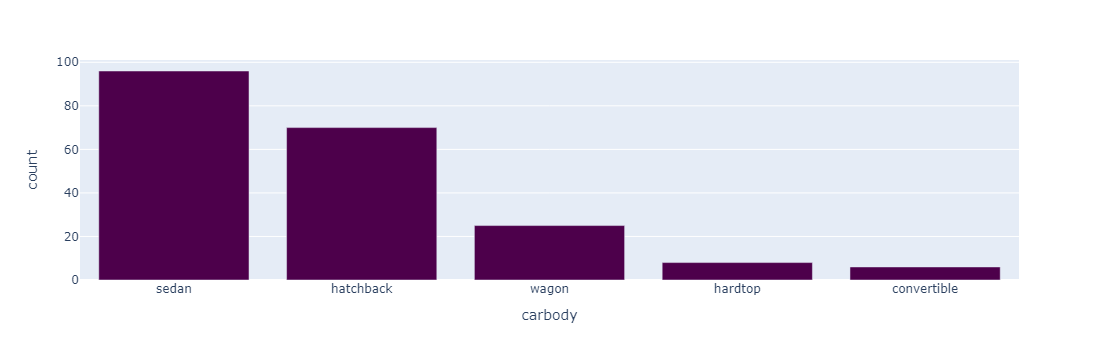

In [88]:
px.bar(car['carbody'].value_counts(),y='count',color_discrete_sequence=px.colors.sequential.BuPu_r)

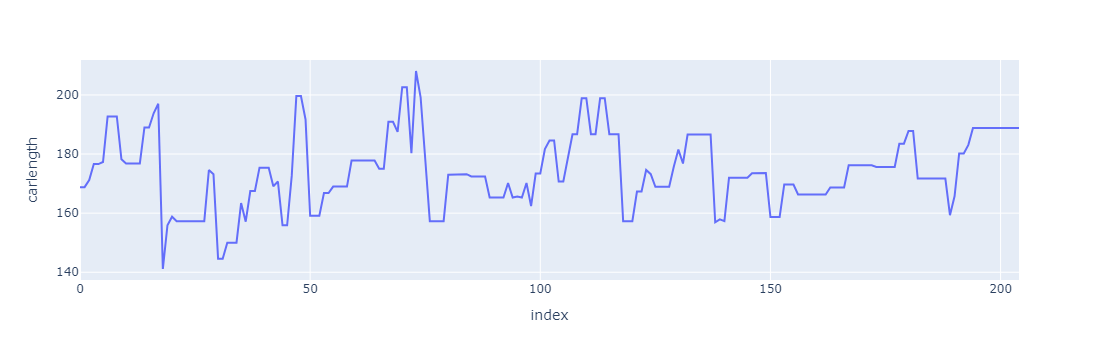

In [89]:
px.line(car,y='carlength')

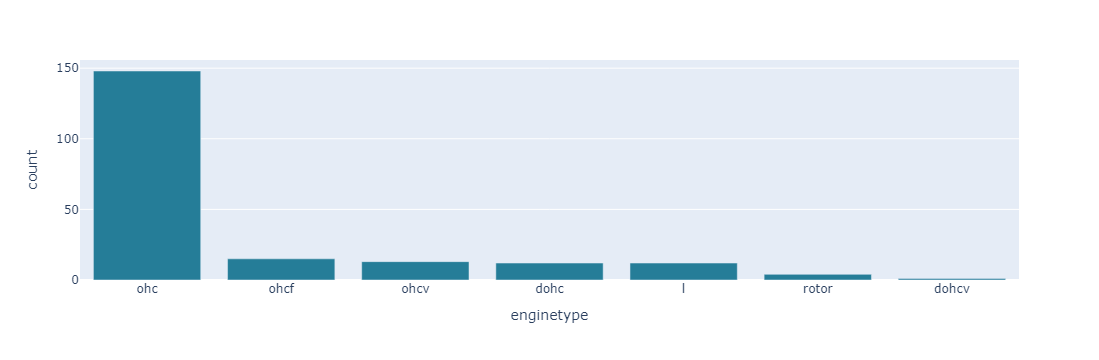

In [90]:
px.bar(car['enginetype'].value_counts(), y='count' ,color_discrete_sequence=px.colors.sequential.Tealgrn_r)

In [91]:
ss=StandardScaler()

C:\Users\ediab\AppData\Local\Temp\ipykernel_16736\1616179235.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\ediab\AppData\Local\Temp\ipykernel_16736\1616179235.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: ylabel='Density'>

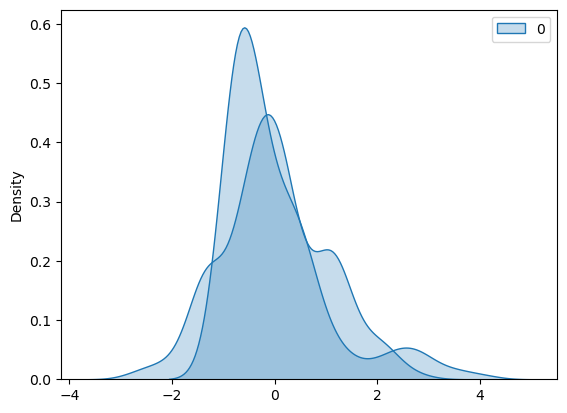

In [92]:
sns.kdeplot(ss.fit_transform(car[['price']]),shade=True,color='red')
sns.kdeplot(ss.fit_transform(car[['carlength']]),shade=True,color='blue')

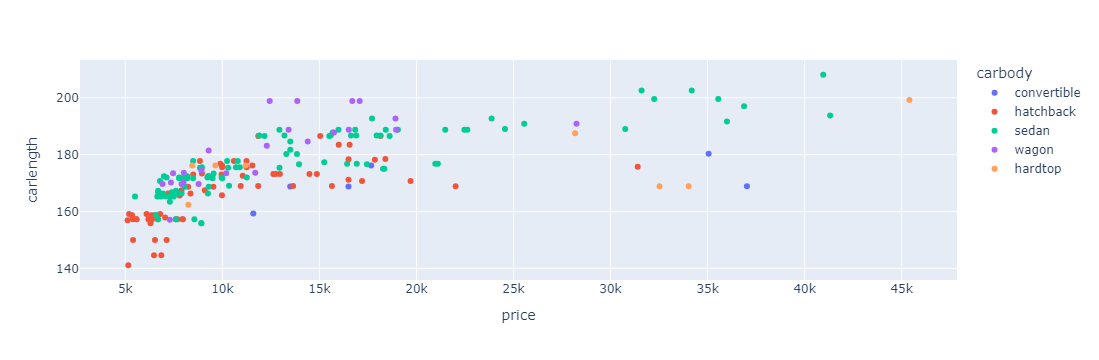

In [93]:
px.scatter(car,x='price',y='carlength',color='carbody')

In [94]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [95]:
car.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [96]:
new_data=car[['carlength','carwidth', 'carheight', 'curbweight','stroke','price']]

In [97]:
for i in new_date.columns:
    new_data[i]=ss.fit_transform(new_date[[i]])

C:\Users\ediab\AppData\Local\Temp\ipykernel_16736\2113348381.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ediab\AppData\Local\Temp\ipykernel_16736\2113348381.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ediab\AppData\Local\Temp\ipykernel_16736\2113348381.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

<Axes: >

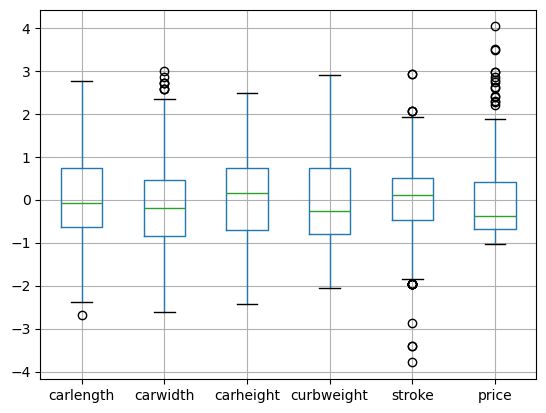

In [98]:
new_data.boxplot()

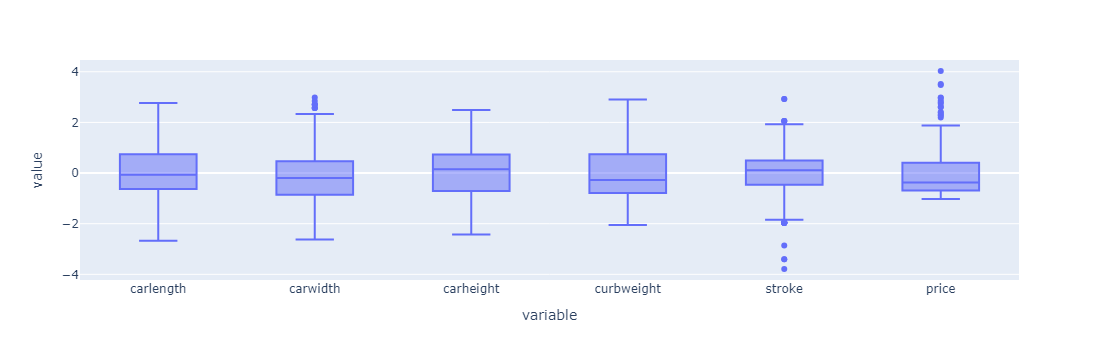

In [99]:
px.box(new_data)

In [100]:
def handling_outliers (car,lst_of_col):
    for i in lst_of_col:
        q1=car[i].quantile(0.25)
        q3=car[i].quantile(0.75)
        iqr=q3-q1
        upper_limit=q3+1.5*iqr
        lower_limit=q1-1.5*iqr

    for col in range(0,car.shape[0]):
        if car[i][col] < lower_limit:
            car[i][col]=lower_limit
        elif car[i][col]> upper_limit:
            car[i][col] =upper_limit
        else:
            continue

    return car

In [101]:
new_data=handling_outliers(new_data,new_data.columns)

C:\Users\ediab\AppData\Local\Temp\ipykernel_16736\1690544840.py:13: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\ediab\AppData\Local\Temp\ipykernel_16736\1690544840.py:13: SettingWithCopyWarning:


A value is trying to be set on a 

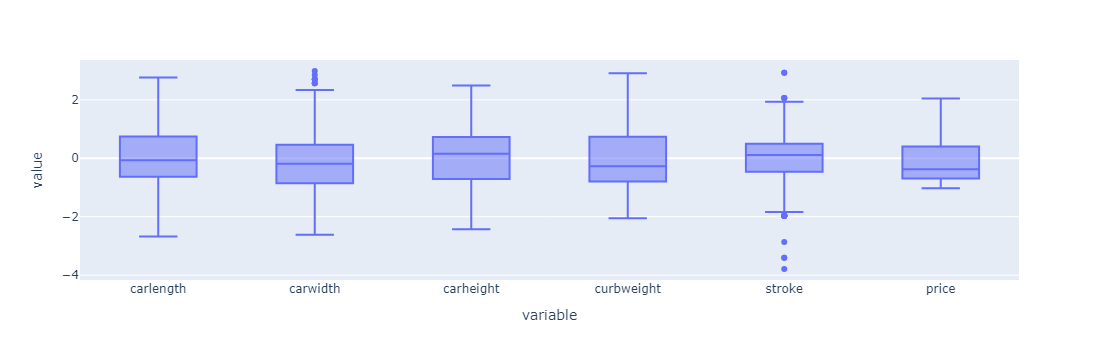

In [102]:
px.box(new_data)

In [103]:
obj_col=car.select_dtypes(include='object').columns
obj_col

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [104]:
for i in obj_col:
    ll=LabelEncoder()
    car[i]=ll.fit_transform(car[i])

In [105]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


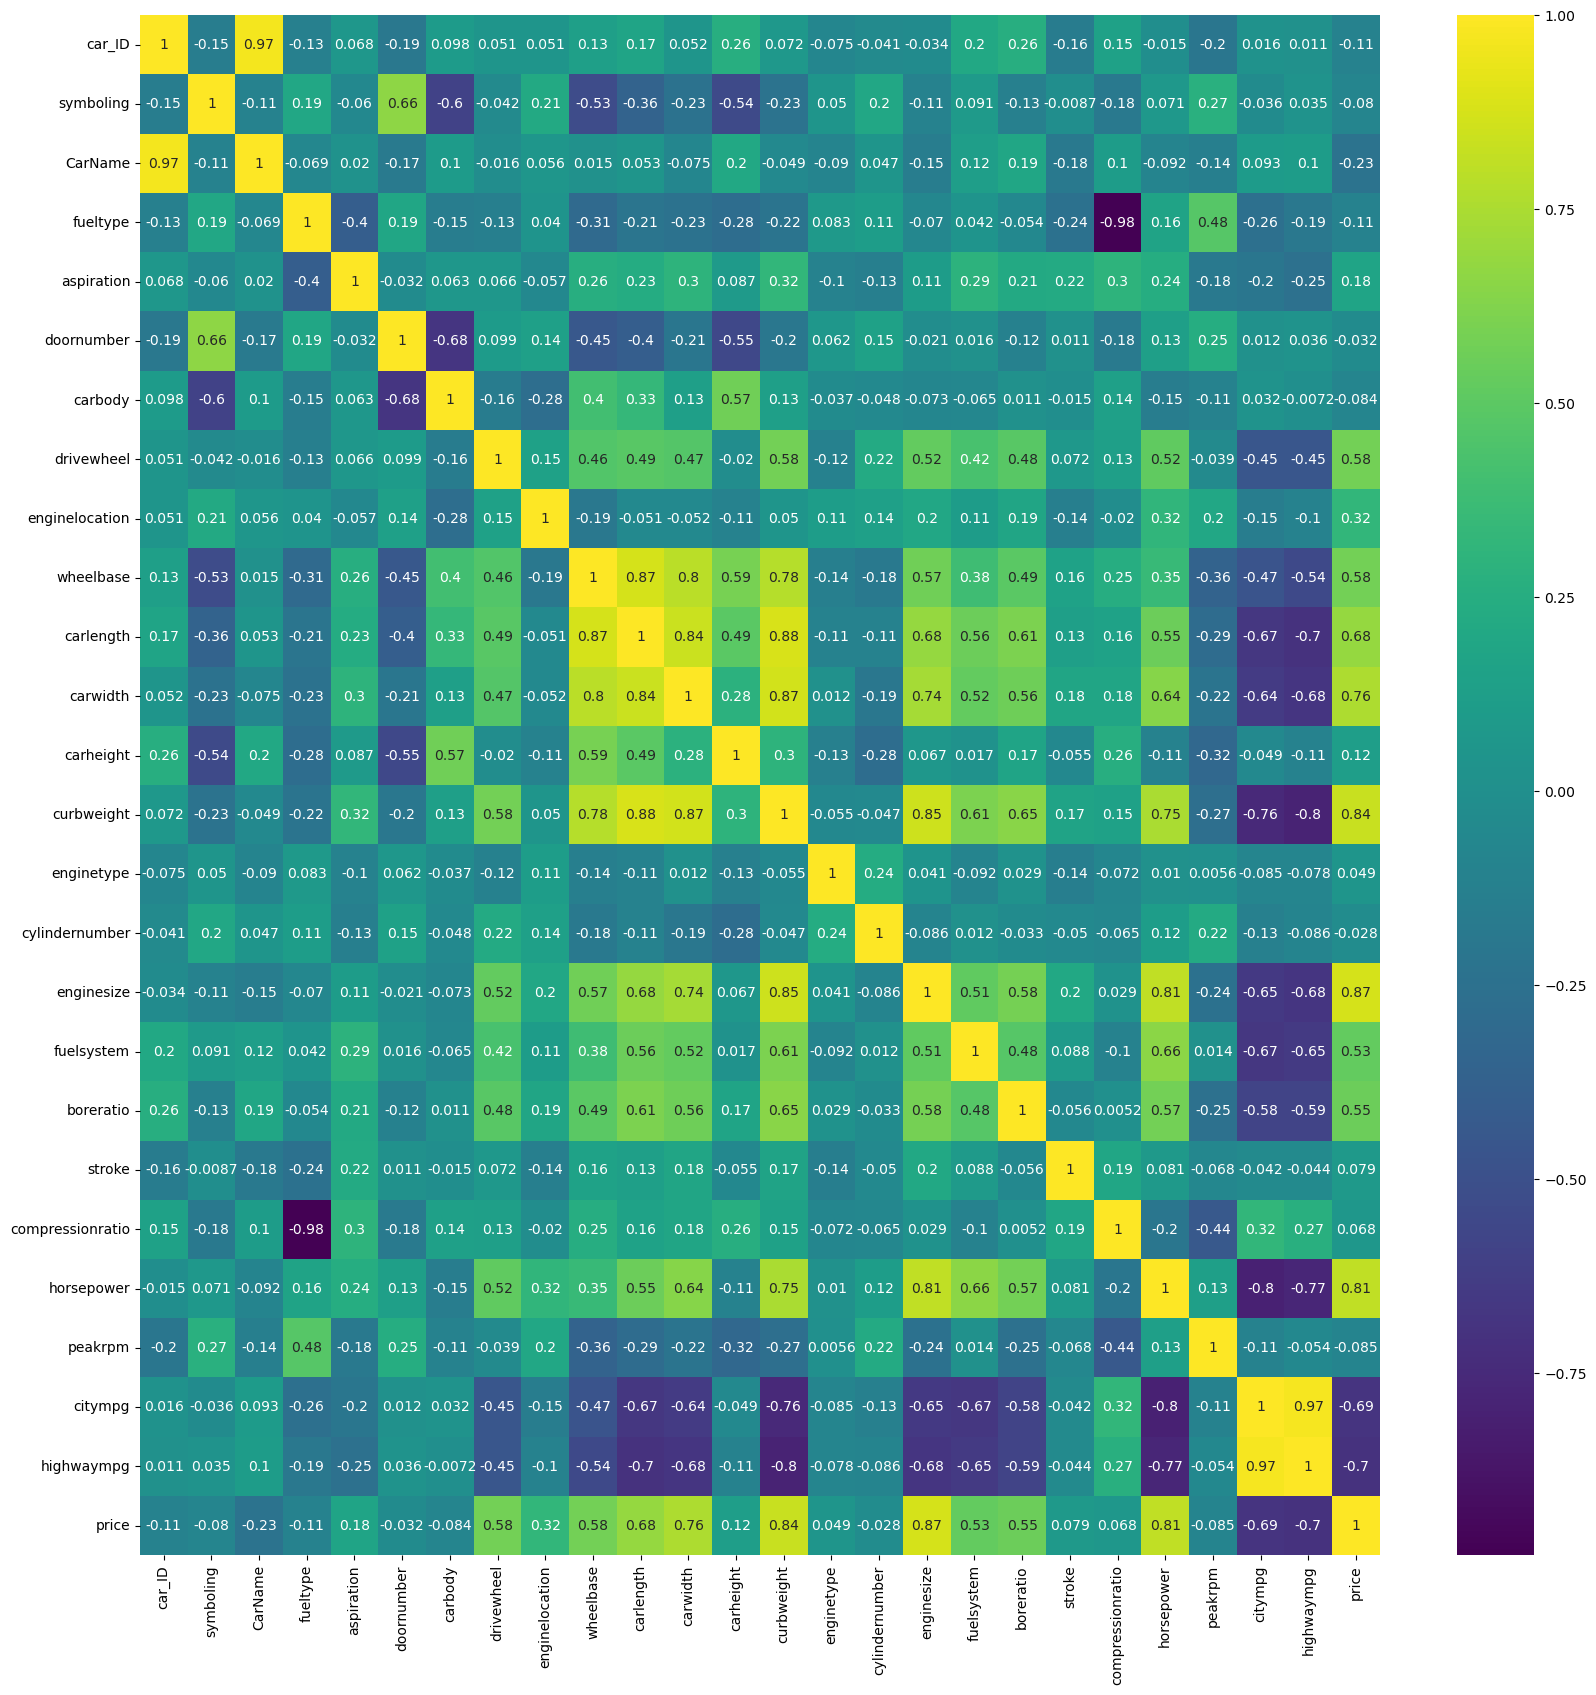

In [106]:
plt.figure(figsize=(20,20))
sns.heatmap(car.corr(),annot=True,cmap='viridis')
plt.show()

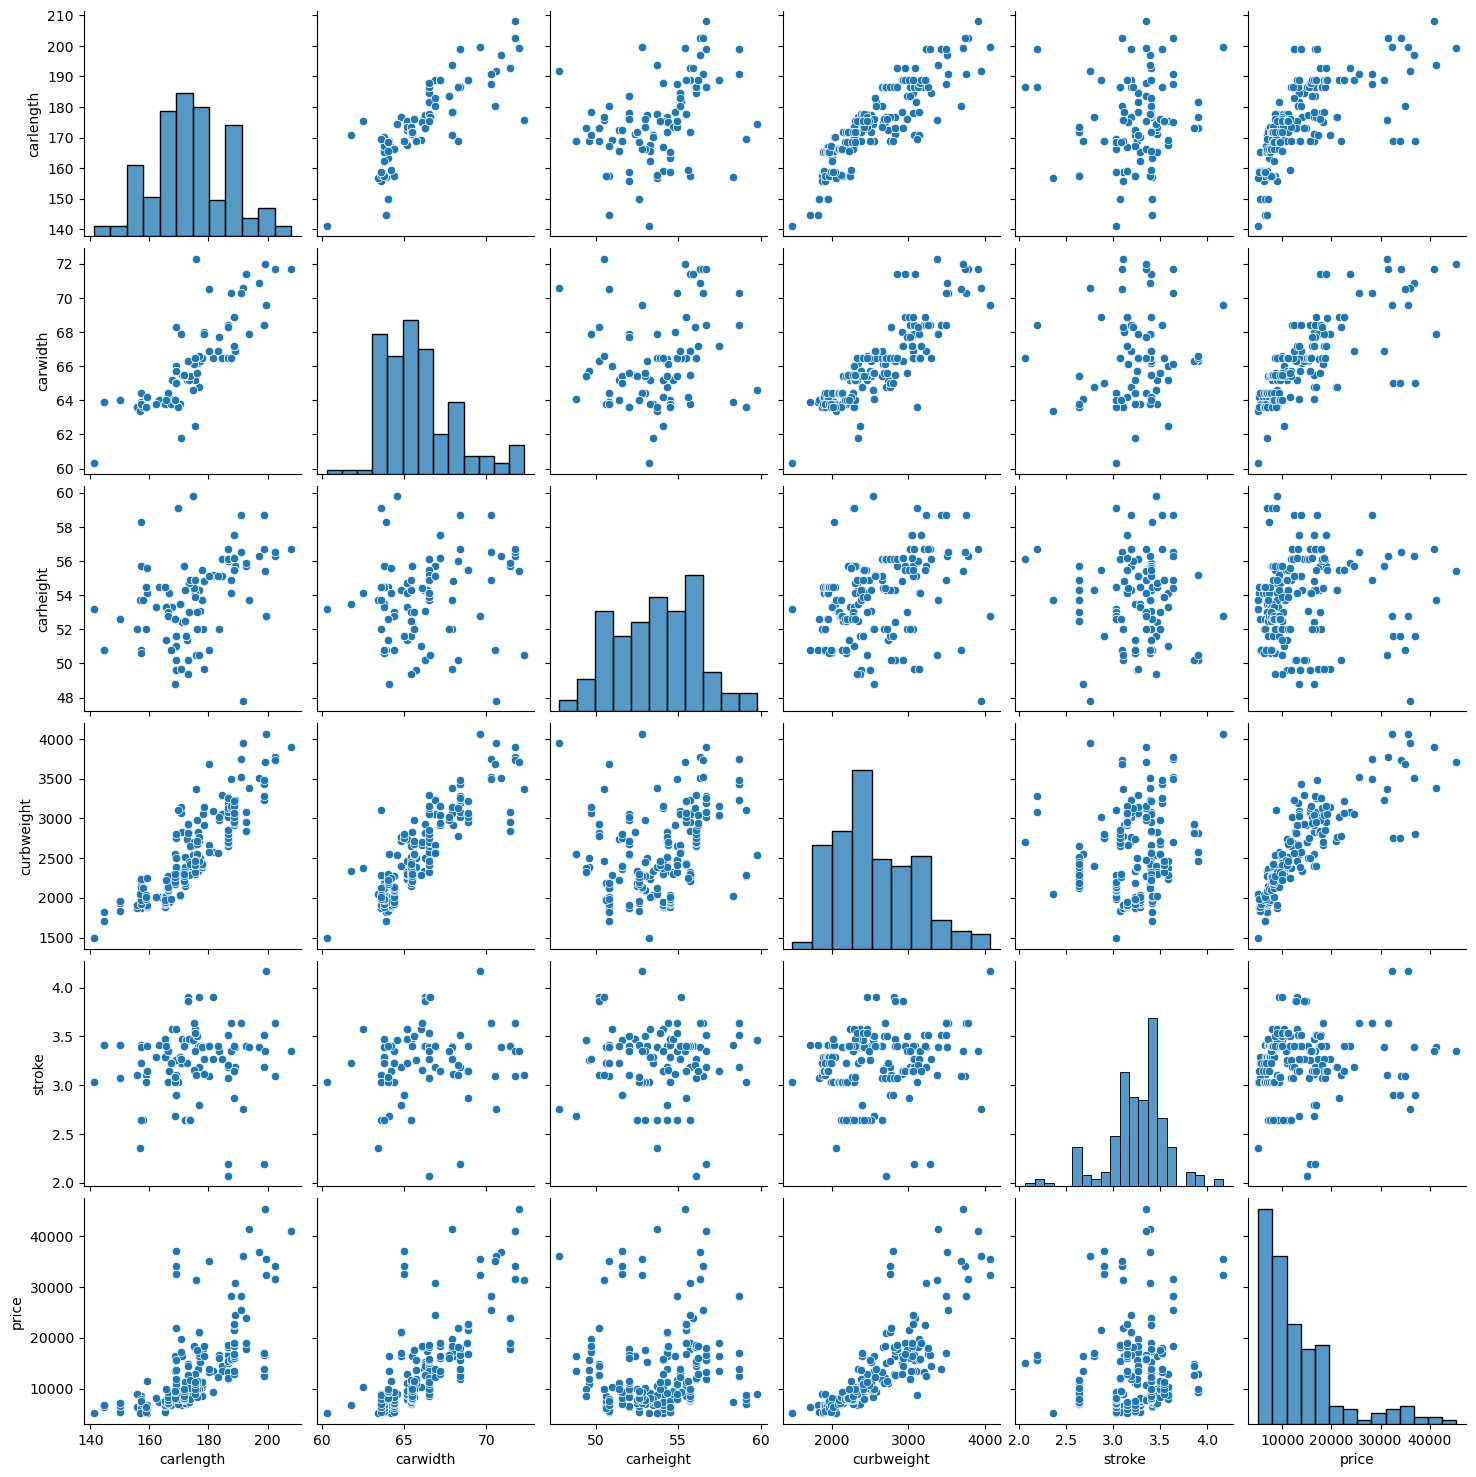

In [107]:
sns.pairplot(car[['carlength','carwidth', 'carheight', 'curbweight','stroke','price']])


In [108]:
X=car.drop(columns=['CarName','car_ID','price'])
y=car[['price']]

In [109]:
ss=StandardScaler()
X=ss.fit_transform(X)

In [110]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [111]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [112]:
y_pred=reg.predict(X_test)

In [113]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [114]:
mse,mae,r2

(15916389.72543959, 2526.407450143428, 0.7983838478445056)

In [115]:
from sklearn.preprocessing import PolynomialFeatures

In [116]:
poly = PolynomialFeatures(degree=1)

In [117]:
X_poly = poly.fit_transform(X)

In [118]:
reg_poly = LinearRegression()

In [119]:
reg_poly.fit(X_poly, y)


LinearRegression()

In [120]:
reg_poly.score(X_poly,y)

0.8802434927425342

In [122]:
import statsmodels.api as sm


In [144]:
aics=[]
bics=[]

In [145]:
degrees=np.arange(1,5)

In [146]:
for degree in degrees:
    # Transform features to polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)
    
    # Fit polynomial regression model
    model = sm.OLS(y_train, sm.add_constant(X_poly_train)).fit()
    
    # Calculate AIC and BIC
    aic = model.aic
    bic = model.bic
    aics.append(aic)
    bics.append(bic)

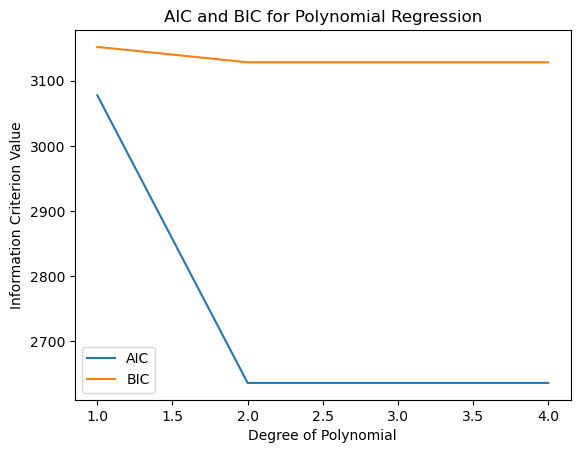

In [147]:
# Plot AIC and BIC for different polynomial degrees
plt.plot(degrees, aics, label='AIC')
plt.plot(degrees, bics, label='BIC')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Information Criterion Value')
plt.title('AIC and BIC for Polynomial Regression')
plt.legend()
plt.show()